In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import fiona
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
dfNeigung0 = gpd.read_file('Einstrahlung_Neigung_0.gpkg')

In [19]:
dfNeigung0

,RasterID,x,y,Globalstrahlung_Jahressumme_kWhm2,Globalstrahlung_Wintersumme_kWhm2,Globalstrahlung_Januar_kWhm2,Globalstrahlung_Februar_kWhm2,Globalstrahlung_Maerz_kWhm2,Globalstrahlung_April_kWhm2,Globalstrahlung_Mai_kWhm2,...,PVProduktion_April_kWhkWp,PVProduktion_Mai_kWhkWp,PVProduktion_Juni_kWhkWp,PVProduktion_Juli_kWhkWp,PVProduktion_August_kWhkWp,PVProduktion_September_kWhkWp,PVProduktion_Oktober_kWhkWp,PVProduktion_November_kWhkWp,PVProduktion_Dezember_kWhkWp,geometry
0,2586125_1189575,2586125,1189575,1285,332,35,56,102,139,164,...,111,128,141,140,120,91,60,33,28,"POLYGON ((2586100.000 1189550.000, 2586150.000..."
1,2586175_1189575,2586175,1189575,1275,323,33,54,102,139,164,...,111,128,141,140,120,91,58,35,27,"POLYGON ((2586150.000 1189550.000, 2586200.000..."
2,2586225_1189575,2586225,1189575,1273,320,31,55,102,139,164,...,111,128,141,140,120,92,59,29,23,"POLYGON ((2586200.000 1189550.000, 2586250.000..."
3,2586275_1189575,2586275,1189575,1284,330,34,56,102,139,164,...,111,128,140,140,120,92,57,37,26,"POLYGON ((2586250.000 1189550.000, 2586300.000..."
4,2586325_1189575,2586325,1189575,1268,318,31,53,102,138,164,...,110,128,139,141,121,91,58,31,27,"POLYGON ((2586300.000 1189550.000, 2586350.000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,2588275_1188225,2588275,1188225,1285,337,37,57,103,139,163,...,111,126,138,139,119,90,59,35,27,"POLYGON ((2588250.000 1188200.000, 2588300.000..."
1340,2588325_1188225,2588325,1188225,1279,333,35,56,103,139,162,...,112,127,139,138,118,91,60,36,26,"POLYGON ((2588300.000 1188200.000, 2588350.000..."
1341,2588375_1188225,2588375,1188225,1281,333,35,56,103,139,163,...,112,127,139,138,119,90,57,37,29,"POLYGON ((2588350.000 1188200.000, 2588400.000..."
1342,2588425_1188225,2588425,1188225,1283,335,36,57,103,139,163,...,111,128,139,138,120,91,59,35,26,"POLYGON ((2588400.000 1188200.000, 2588450.000..."


In [20]:
dfTest = dfNeigung0.query("RasterID == '2586125_1189575'")


In [21]:
dfTest.dtypes

RasterID                               object
x                                       int64
y                                       int64
Globalstrahlung_Jahressumme_kWhm2       int64
Globalstrahlung_Wintersumme_kWhm2       int64
Globalstrahlung_Januar_kWhm2            int64
Globalstrahlung_Februar_kWhm2           int64
Globalstrahlung_Maerz_kWhm2             int64
Globalstrahlung_April_kWhm2             int64
Globalstrahlung_Mai_kWhm2               int64
Globalstrahlung_Juni_kWhm2              int64
Globalstrahlung_Juli_kWhm2              int64
Globalstrahlung_August_kWhm2            int64
Globalstrahlung_September_kWhm2         int64
Globalstrahlung_Oktober_kWhm2           int64
Globalstrahlung_November_kWhm2          int64
Globalstrahlung_Dezember_kWhm2          int64
PVProduktion_Jahressumme_kWhkWp         int64
PVProduktion_Wintersumme_kWhkWp         int64
PVProduktion_Januar_kWhkWp              int64
PVProduktion_Februar_kWhkWp             int64
PVProduktion_Maerz_kWhkWp         

In [22]:
#Fill array names. Add new year
names = []
names = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

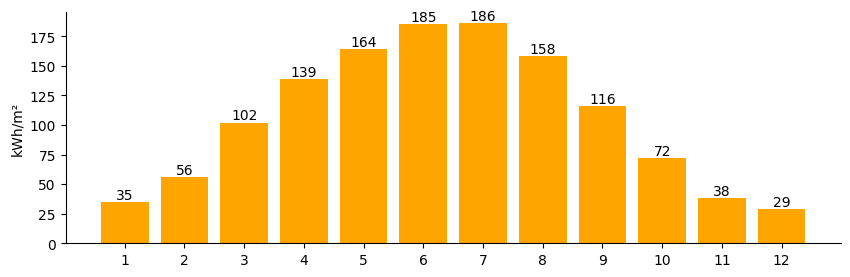

In [50]:
for Id in dfTest['RasterID']:

  values = []
  values = [
  int(dfTest.loc[0, 'Globalstrahlung_Januar_kWhm2']),
  dfTest.loc[0, 'Globalstrahlung_Februar_kWhm2'],
  dfTest.loc[0, 'Globalstrahlung_Maerz_kWhm2'],
  dfTest.loc[0, 'Globalstrahlung_April_kWhm2'],
  dfTest.loc[0, 'Globalstrahlung_Mai_kWhm2'],
  dfTest.loc[0, 'Globalstrahlung_Juni_kWhm2'],
  dfTest.loc[0, 'Globalstrahlung_Juli_kWhm2'],
  dfTest.loc[0, 'Globalstrahlung_August_kWhm2'],
  dfTest.loc[0, 'Globalstrahlung_September_kWhm2'],
  dfTest.loc[0, 'Globalstrahlung_Oktober_kWhm2'],
  dfTest.loc[0, 'Globalstrahlung_November_kWhm2'],
  dfTest.loc[0, 'Globalstrahlung_Dezember_kWhm2'],
  ]

  ax = plt.axes()
  bar = plt.bar(names, values, color= 'orange')
  plt.xticks(names)
  plt.ylabel('kWh/m²')

  #Deaktiviert Rahmen oben und rechts
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

  ax.bar_label(bar)

  fig = plt.gcf()
  fig.set_size_inches(10, 3)
  plt.savefig('strahlung' + str(Id) + '.png', dpi=400, bbox_inches='tight',transparent=True)
  plt.show()


